# Wyjątki, obsługa błędów oraz podstawowe operacje na plikach

Zapoznamy się z słowami kluczowymi:

* try, with, assert, except, raise, finally 


<br>


oraz funkcjami wbudowanymi:

* open

<br>


## Błędy i wyjątki

W Pythonie można je właściwie traktować jako synonimy. Z pewnością mieliście już okazję zapoznać się z wieloma z nich. Wyjątki są rodzajem błędów wykrytych podczas działania programu. Są obiektami, które dziedziczą po klasie *BaseException*, możemy zatem prosto definiować własne klasy błędów, ale o tym więcej przy okazji OOP.

Istnieje hierarchia wyjątków, o której więcej można przeczytać poniżej:

https://docs.python.org/3/library/exceptions.html

Wyjątki mogą być przechwycone, czyli w pewien sposób przewidziane i obsłużone przez programistę. W tym celu posługujemy się składnią **try-except-else-finally**, która przypomina bloki warunkowe *if-elif-else*, z tym że w miejscach wyrażeń umieszczamy nazwy klas błędów.

In [18]:
try:
    # tutaj zamieszczamy kod, w którym może wystąpić wyjątek
    pass
    
except KlasaOczekiwanegoWyjątku:
    # kod obsługujący sytuację, w której wystąpi dany wyjątek
    pass
    
except InnaKlasaOczekiwanegoWyjątku as nazwa:
    # kod obsługujący inny wyjątek (można coż zrobić z $nazwa)
    pass
    
else:
    # kod wykonywany, gdy wyjątek nie wystąpił
    pass

finally:
    # kod wykonywany zawsze
    pass

In [2]:
def moja_funkcja_dzielaca(a, b):
    
    try:
        return a / b
    
    except ZeroDivisionError:
        print("Próbujesz dzielić przez 0 ziom")
        
        return
        
    except TypeError:
        print("Dzielenie niezdefiniowane na typach podanych zmiennych")
        
        return

moja_funkcja_dzielaca(1, "0")
moja_funkcja_dzielaca(1, 0)

Dzielenie niezdefiniowane na typach podanych zmiennych
Próbujesz dzielić przez 0 ziom


W pewnych przypadkach możemy chcieć wywołać błąd.. służy temu instrukcja **raise**.

In [3]:
def wazna_funkcja_dla_szefa():
    raise NotImplementedError("XYZ sie obija!")
    
    # w ogólności
    # raise Exception("wiadomość")
    
wazna_funkcja_dla_szefa()


NotImplementedError: XYZ sie obija!

W niektórych sytuacjach możemy chcieć by błąd przerwał wykonywanie programu, ale dopiero gdy np. zapiszemy jakieś dane.. następnie ponownie go zgłaszamy.

In [ ]:
try:
    do_something_dangerous()
    
except:
    do_something_to_apologize()
    
    raise # <--

Możemy również kożystać z instrukcji *assert* by wewołać specjalny rodzaj błędu, gdy dany warunek nie jest spełniony

In [27]:
x = "niestety"

assert x != "niestety", "tak, niestety.."

# x niestety nie jest różne 'niestety' --> podniesiony zostaje błąd z wiadomością podaną po przecinku

AssertionError: tak, niestety..

Trzy końcowe uwagi:
* w ogólności należy unikać samego *except*, ponieważ wyłapie **wszystkie** błędy, nawet te, z którymi absolutnie trzeba coś zrobić
* wyrażenie *except: pass* to jeszcze większe fe bo zwyczajnie **wszystkie** ignorujemy (np. *KeyboardInterrupt*, *SystemExit*)
* *raise* w bloku *except* również może budzić kontrowersje - co jeżeli *do_something_to_apologize* napotka na własny błąd? Bardziej wyrafinowane rozwiązania będą wymagać OOP

## Podstawowe operacje na plikach

W celu otwierania / tworzenia nowych plików używamy wbudowaną funkcję *open*; jej najważniejsze argumenty to ścieżka do pliku oraz jednoliterowy kod trybu otwarcia.

|||
|--|:--|
|'r'    |   open for reading (default)|
|'w'     |  open for writing, truncating the file first|
|'x'     |  create a new file and open it for writing|
|'a'     |  open for writing, appending to the end of the file if it exists|
|'b'     |  binary mode|
|'t'     |  text mode (default)|
|'+'     |  open a disk file for updating (reading and writing)|

UWAGA : po otwarciu pliku zawsze należy go zamknąć! Należy również wybrać właściwy tryb - inaczej dane w pliku mogą zostać skasowane...

In [36]:
fp = open('filename.txt', 'x')
fp.write("Witaj pamietniczku")
fp.close()

fp = open('filename.txt', 'r')
data = fp.read()
fp.close()
print(data)

Witaj pamietniczku


Słowo kluczowe *with* ułatwia nam pracę z plikami (tzw. context manager)

with open(path, mode) as name:
        
        statements-using-name

In [37]:
with open('filename.txt') as file: # domyślnie mode='r'
    print(file.read())

Witaj pamietniczku


Nasze działanie przypomina wtedy bardziej..

In [38]:
try:
    file = open('filename.txt')
    file.read()
    
finally:
    file.close()

Metody *readlines* oraz *readline* dają nam dodatkową kontrolę nad wczytywaniem pliku

In [86]:
data = "How do I reeeach these keeds\nHOW DO I REACH THESE KEEEEEEDS!!"

with open('filename1.txt', 'x') as f:
    f.write(data)

In [88]:
with open('filename1.txt') as f:
    read_back = [[w.lower() for w in line.strip().split()] for line in f.readlines() if line.startswith('H')]
    
print(read_back)

[['how', 'do', 'i', 'reeeach', 'these', 'keeds'], ['how', 'do', 'i', 'reach', 'these', 'keeeeeeds!!']]


**Zadanie 1.** Napisz program, który wczytuje dane z pliku *data.fasta* i przekształca je w słownik {Accession : długość sewkwencji}.

**Zadanie 2.** Uzupełnij poniższy program generujący ewolucję zasady 110 ECA (ang. elementary cellular automata). Wynik zapisz do pliku w formacie PPM (ang. portable pixmap). Zasada ewolucji 1D automatu komórkowego polega na tym, że dla każdej komórki nowej generacji C<sub>i,j</sub> patrzymy na sąsiedztwo o promieniu 1 poprzedniej. Czyli wystarczy wyszukać slice [obecna generacja][j-1:j+2] (j=obecna komórka) do słownika *rule_table* aby uzyskać wartość komórki w następnej generacji. (należy najpierw zamienić go na krotke - tuple()).



Nagłówek pliku .ppm zawiera w osobnych linijkach:

P3\
szerokość wysokość (liczby pixeli rozdzielone spacją)\
maksymalna wartosć pikseli\
R G B\
R G B\
R G B\
... kolejnych pixeli


In [ ]:
rule_table = {(1,1,1):0, (1,1,0):1, (1,0,1):1, (1,0,0):0, (0,1,1):1, (0,1,0):1, (0,0,1):1, (0,0,0):0}

WIDTH, HEIGHT = ... # liczba komórek w generacji, liczba generacji np. 500,500

grid = ... # lista list - inicjalizacja kolejnych generacji komórek

grid[0][WIDTH/2] = 1 # w generacji początkowej ustawiamy stan ostatniej komórki na 1 (arbitralnie)


for ...
    for ...
        
        grid[i+1][j] = ...

# TODO: Zapisz grid do pliku w formacie .ppm (wystarczy poprzedzić go odpowiednim nagłówkiem)

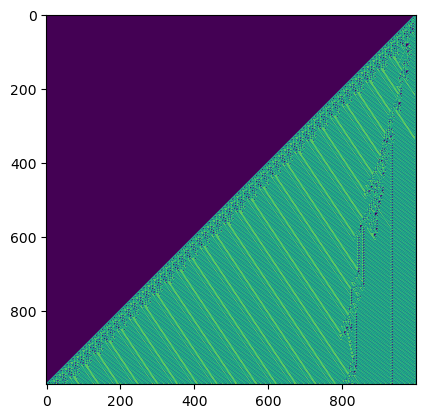

In [12]:
import matplotlib.pyplot as plt

plt.imshow(grid)

**Zadanie 3.** Napisz funkcję, która przyjmuje ścieżkę do pliku *.fasta* a zwraca słownik słowników {Accession : { zliczenia zasad azotowych (ATCG)}} zawartych w nim sekwencji DNA. Zadbaj o to, aby w przypadku wystąpienia problemów, z którąś z sekwencji, wszystkie obliczenia dla prawidłowych zostały wykonane. Identyfikatory niepoprawnych sekwencji zapisz do nowego pliku.